<a href="https://colab.research.google.com/github/JinshiAshok/Deep-learning-projects/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
df=df=pd.read_csv("/content/twitter_training.csv",encoding="ISO-8859-1",names=['id', 'country', 'label', 'text'])
df

,id,country,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
15832,3108,Dota2,Negative,She wtf
15833,3108,Dota2,Negative,wtf
15834,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15835,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


In [ ]:
df.shape

(15837, 4)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15837.0,NaN,NaN,NaN,5596.944308,4482.6612,1.0,1878.0,2958.0,9321.0,13200.0
country,15837,7,CallOfDutyBlackopsColdWar,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,15837,4,Negative,4674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,15676,14816,It is not the first time that the EU Commissio...,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15837 entries, 0 to 15836
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       15837 non-null  int64 
 1   country  15837 non-null  object
 2   label    15837 non-null  object
 3   text     15676 non-null  object
dtypes: int64(1), object(3)
memory usage: 495.0+ KB


In [ ]:
df.isna().sum()

id           0
country      0
label        0
text       161
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(15676, 4)

In [ ]:
df.isna().sum()

id         0
country    0
label      0
text       0
dtype: int64

In [ ]:
df['country'].value_counts()

CallOfDutyBlackopsColdWar    2343
NBA2K                        2343
Overwatch                    2316
Xbox(Xseries)                2283
Borderlands                  2280
Amazon                       2276
Dota2                        1835
Name: country, dtype: int64

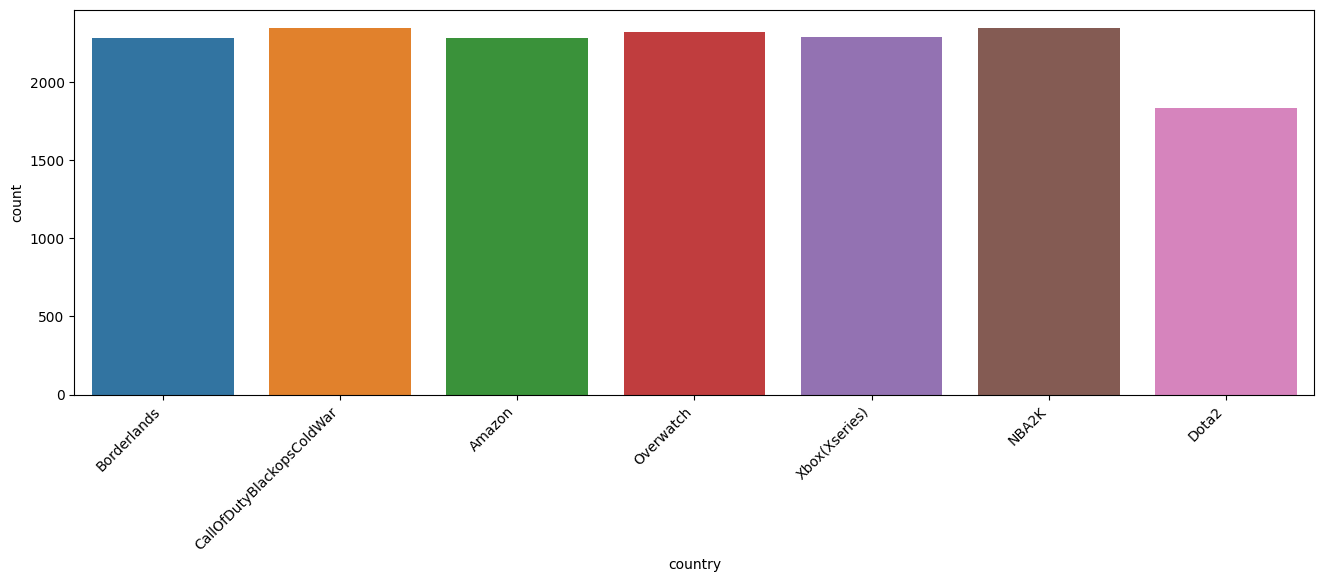

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(x='country', data=df)
plt.xticks(rotation=45, ha='right') # Adjust rotation and alignment as needed
plt.show()

In [ ]:
df['label'].value_counts()

Negative      4648
Positive      4575
Neutral       3565
Irrelevant    2888
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

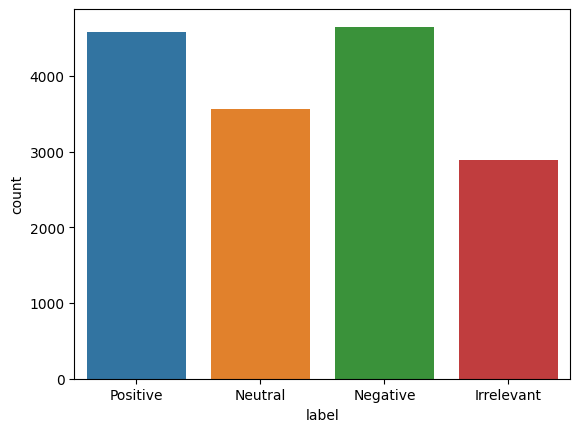

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
df.drop(df.index[(df['label']=='Irrelevant')],axis=0,inplace=True)
df

,id,country,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
15829,3108,Dota2,Negative,wtf
15830,3108,Dota2,Negative,wtf
15831,3108,Dota2,Negative,wtf
15832,3108,Dota2,Negative,She wtf


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,id,country,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
12783,3108,Dota2,Negative,wtf
12784,3108,Dota2,Negative,wtf
12785,3108,Dota2,Negative,wtf
12786,3108,Dota2,Negative,She wtf


In [ ]:
df.shape

(12788, 4)

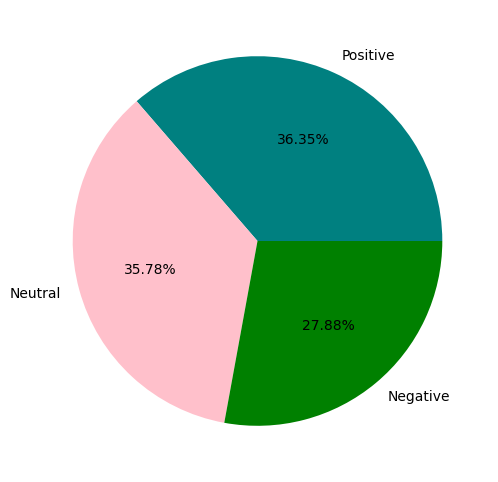

In [ ]:
plt.figure(figsize=(10,6))
color=['teal','pink','green']
label=['Positive','Neutral','Negative']
plt.pie(df['label'].value_counts(),labels=label,colors=color,autopct='%1.2f%%')
plt.show()


In [ ]:
df.drop(['id','country'],axis=1,inplace=True)
df

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
12783,Negative,wtf
12784,Negative,wtf
12785,Negative,wtf
12786,Negative,She wtf


In [ ]:
df['label']=df['label'].map({"Positive":1,"Neutral":0,"Negative":-1})
df

,label,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
12783,-1,wtf
12784,-1,wtf
12785,-1,wtf
12786,-1,She wtf


In [ ]:
df['label'].value_counts()

-1    4648
 1    4575
 0    3565
Name: label, dtype: int64

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
tweet=df.text
tweet

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
12783                                                  wtf
12784                                                  wtf
12785                                                  wtf
12786                                              She wtf
12787                                                  wtf
Name: text, Length: 12788, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweet

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
12783                                                  wtf
12784                                                  wtf
12785                                                  wtf
12786                                              She wtf
12787                                                  wtf
Name: text, Length: 12788, dtype: object

In [ ]:
#to remove special character from tokens
import re
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-24-6504e8784e02>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')


0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
12783                                                  wtf
12784                                                  wtf
12785                                                  wtf
12786                                              She wtf
12787                                                  wtf
Name: text, Length: 12788, dtype: object

In [ ]:
#to collect tokens >>>>>>>length >= 3(meaningfull word)
from nltk.tokenize import word_tokenize
tweet=tweet.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

0         get borderland and will murder you all
1          come the border and will kill you all
2           get borderland and will kill you all
3        come borderland and will murder you all
4         get borderland and will murder you all
                          ...                   
12783                                        wtf
12784                                        wtf
12785                                        wtf
12786                                    she wtf
12787                                        wtf
Name: text, Length: 12788, dtype: object

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweet

0         get borderland murder
1              come border kill
2           get borderland kill
3        come borderland murder
4         get borderland murder
                  ...          
12783                       wtf
12784                       wtf
12785                       wtf
12786                       wtf
12787                       wtf
Name: text, Length: 12788, dtype: object

In [ ]:
#Tfid vectorization>>>>>>>>>coversion of given data in to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweet)
data

<12788x7187 sparse matrix of type '<class 'numpy.float64'>'
	with 129977 stored elements in Compressed Sparse Row format>

In [ ]:
data.shape

(12788, 7187)

In [ ]:
y=df['label'].values
y

array([ 1,  1,  1, ..., -1, -1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 0, -1, -1, ...,  0, -1,  1])

In [ ]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
base=MultinomialNB()
model=SVC()
lst=[knn,base,model]

In [ ]:

for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('***********************************************')
  print(accuracy_score(y_test,y_pred))
  print('***********************************************')
  print(confusion_matrix(y_test,y_pred))
  print('***********************************************')
  print(classification_report(y_test,y_pred))


KNeighborsClassifier(n_neighbors=7)
***********************************************
0.9301537659629919
************************************************
[[1361   14   24]
 [  77  965   21]
 [ 122   10 1243]]
************************************************
              precision    recall  f1-score   support

          -1       0.87      0.97      0.92      1399
           0       0.98      0.91      0.94      1063
           1       0.97      0.90      0.93      1375

    accuracy                           0.93      3837
   macro avg       0.94      0.93      0.93      3837
weighted avg       0.93      0.93      0.93      3837

MultinomialNB()
***********************************************
0.8308574407088871
************************************************
[[1273   25  101]
 [ 207  682  174]
 [ 117   25 1233]]
************************************************
              precision    recall  f1-score   support

          -1       0.80      0.91      0.85      1399
           0      